<a href="https://colab.research.google.com/github/sinyoung0110/DeepLearning_2024_2/blob/main/Deep_Leanring_%E1%84%86%E1%85%A1%E1%84%8C%E1%85%B5%E1%84%86%E1%85%A1%E1%86%A83(%E1%84%80%E1%85%AD%E1%84%8C%E1%85%A2164)5%E1%84%8C%E1%85%A1%E1%86%BC_%E1%84%8C%E1%85%A5%E1%86%AB%E1%84%8B%E1%85%B5%E1%84%92%E1%85%A1%E1%86%A8%E1%84%89%E1%85%B3%E1%86%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#한글 서체 설치 # 생략 가능
#실행하려면 다음 코드 앞의 #를 삭제한 후 실행해주세요.

#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
#설치 후 런타임 > 런타임 다시 시작을 해줘야 합니다.
#이 과정이 싫다면 5.2 합성곱 신경맛 맛보기로 건너 뛰어도 상관없습니다.

In [ ]:
#한글깨짐 해결
#이 과정이 싫다면 건너 뛰어도 상관없습니다. 실행하려면 다음 코드 앞의 #을 삭제해주세요.
#import matplotlib.pyplot as plt

#plt.rc('font', family='NanumBarunGothic')

In [ ]:
#5.2 합성곱 신경망 맛보기

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


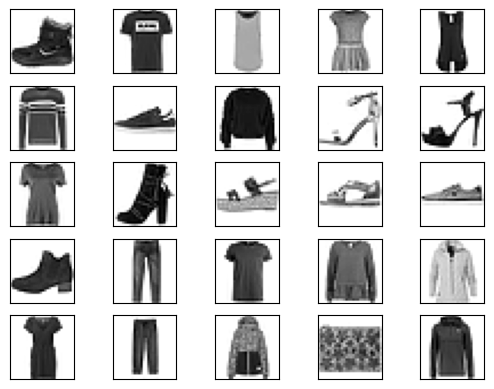

In [3]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',   'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False) # 격자선 숨김
    plt.xticks([])  # x축 눈금 숨김
    plt.yticks([])  # y축 눈금 숨김
    plt.imshow(x_train[i], cmap=plt.cm.binary) # imshow는 원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림
plt.show()

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7576 - loss: 0.6830
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8522 - loss: 0.4066
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8653 - loss: 0.3739
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8710 - loss: 0.3500
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8805 - loss: 0.3226
313/313 - 2s - 7ms/step - accuracy: 0.8705 - loss: 0.3516


[0.3516320288181305, 0.8705000281333923]

In [5]:
X_train_final = x_train.reshape((-1, 28, 28, 1)) / 255.
X_test_final = x_test.reshape((-1, 28, 28, 1)) / 255.

In [6]:
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,  activation='softmax')
])

model_with_conv.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final,  y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6005 - loss: 1.0884
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7976 - loss: 0.5512
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8335 - loss: 0.4620
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8485 - loss: 0.4150
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8569 - loss: 0.3899
313/313 - 2s - 5ms/step - accuracy: 0.8622 - loss: 0.3841


[0.3841082751750946, 0.8622000217437744]

In [8]:
# <노트>
# pip install scikit_image: 노트의 내용을 실습하기 위해서는 scikit_image 라이브러리를 설치해야합니다
!pip install scikit_image

In [9]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [10]:
def print_image_summary(image, labels):

    print('--------------')
    print('Image Details:')
    print('--------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')

    if len(labels) == 1:
        image = image[..., np.newaxis]

    for i, lab in enumerate(labels):
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')

Saving bird.jpg to bird.jpg


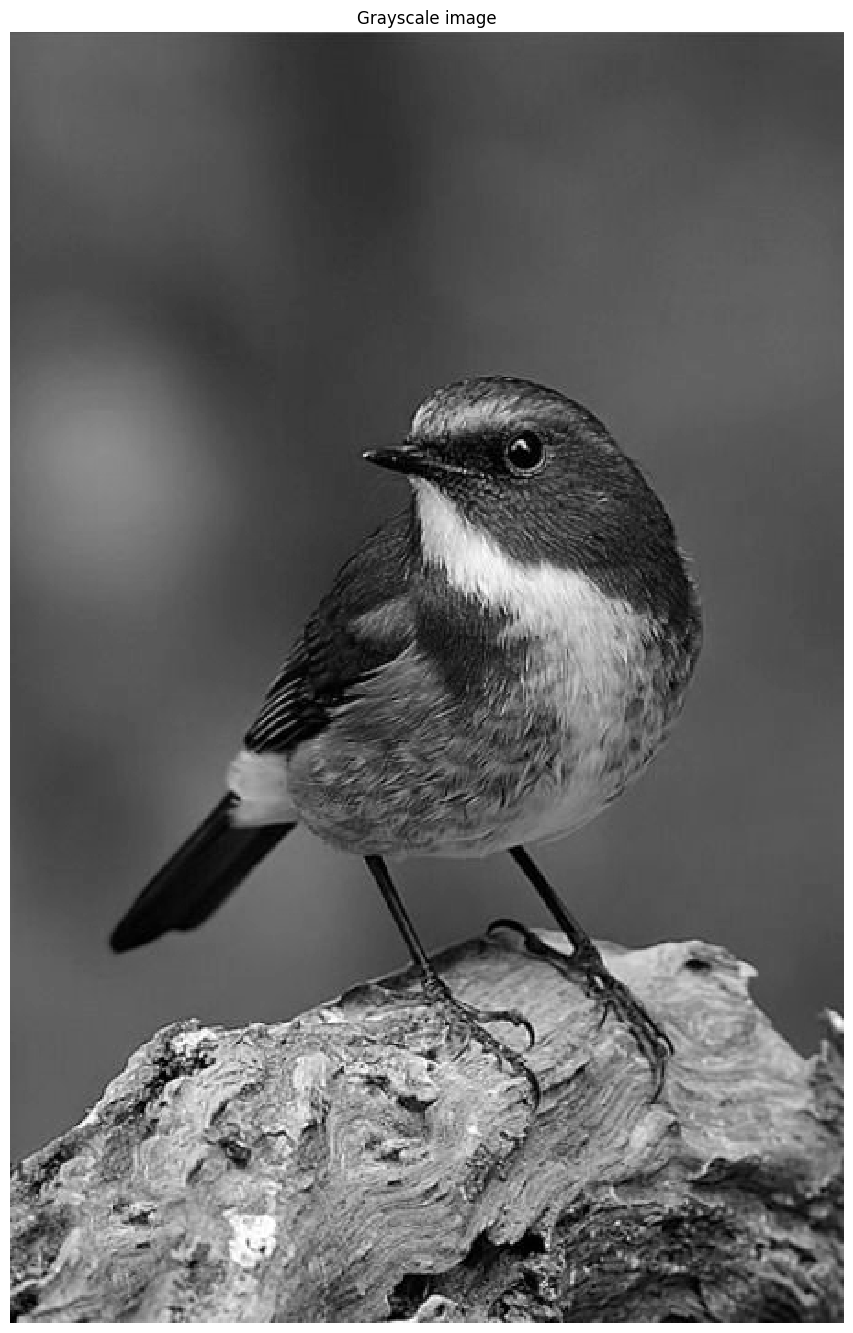

In [11]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # 데이터 불러오기

image_gs = imread('bird.jpg', as_gray=True)
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_gs, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off');

In [12]:
print_image_summary(image_gs, ['G'])
# </노트>

--------------
Image Details:
--------------
Image dimensions: (703, 454)
Channels:
G : min=0.0000, max=1.0000


######################################
#### P 164 전이학습
####

# 전이학습 ( transfer learning )
: 이미지넷처럼 아주 큰 데이터셋을 써서 훈련된 모델의 가중치를 가져와 우리가 해결하려는 과제에 맞게 보정해서 사용하는 것.

=>결과적으로 비교적 적은 수의 데이터를 가지고도 우리가 원하는 과제를 해결할 수 있음

>**특성 추출 기법 (feature extractor)**   
: ImageNet 데이터셋으로 사전 훈련된 모델을 가져온 후 마지막에 완전 연결층 부분만 새로 만듦
입력데이터 -> 사전 훈련된 합성곱 재사용 -> 데이터 분류기(완전연결층) -> 출력

ex) ResNet50, VGG16, Xception, Inception V3

In [13]:
#5.3 전이학습
# 5.3.1 특성추출(Feature Extractor) 기법

In [14]:
# 주요 라이브러리 불러오기
import numpy as np                   # 다차원 배열과 행렬 계산을 위한 라이브러리
import tensorflow as tf              # 딥러닝 모델 구현을 위한 텐서플로 라이브러리
import matplotlib.pyplot as plt      # 데이터 시각화를 위한 라이브러리
import matplotlib.image as mpimg     # 이미지 처리를 위한 라이브러리

# Keras 모듈에서 필요한 클래스와 함수 불러오기
from tensorflow.keras import Model                  # 모델의 기본 클래스
from tensorflow.keras.models import Sequential      # Sequential 모델을 생성하는 클래스
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D  # 신경망의 레이어들
from tensorflow.keras.applications import ResNet50  # ResNet50 모델 불러오기 (전이 학습에 사용)
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # 이미지 데이터 전처리를 위한 클래스


In [15]:
model = ResNet50(include_top=True,    # 네트워크의 최상단 완전 연결층 포함 여부 (True로 설정 시 ImageNet의 분류 레이어 포함)
                 weights="imagenet",  # 미리 학습된 ImageNet 가중치를 로드하여 전이 학습에 사용
                 input_tensor=None,   # 입력 텐서 지정 (기본값 None; 별도 텐서를 지정할 수 있음)
                 input_shape=None,    # 입력 이미지의 크기 지정 (기본값 None; ResNet50 기본 크기 사용)
                 pooling=None,        # 완전 연결층을 제외한 경우, 특징 맵의 풀링 방식 (None: 풀링 없음)
                 classes=1000)        # 분류할 클래스 수 (ImageNet은 1000개의 클래스가 있음)


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [16]:
model.summary()  # 모델의 전체 구조와 파라미터 수 요약 출력

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [35]:
# 모델의 모든 가중치를 고정하여 학습되지 않도록 설정 (특징 추출 용도로 사용)
model.trainable = False  # ResNet50의 기존 가중치를 그대로 사용하여 특징을 추출함.
                         # 마지막 Dense 층만 훈련하여 고양이와 개를 분류하기 위해 False로 설정.
                         # 이렇게 하면 모델의 훈련 시간이 단축되고 과적합을 방지할 수 있음.


# Sequential 모델을 재구성
model = Sequential([
    model,                          # 기존 ResNet50 모델을 첫 번째 층으로 추가
    Dense(2, activation='sigmoid')  # 출력층: 2개의 뉴런, 시그모이드 활성화 함수 사용 (이진 분류를 위한 출력층)
])

# 수정된 모델 구조 출력
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ (None, 2)                   │      25,638,726 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,638,726 (97.80 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 25,638,726 (97.80 MB)

In [26]:
model.compile(loss='binary_crossentropy',    # 이진 분류 문제에 맞는 손실 함수 사용 (고양이와 개를 구분하는 문제)
              optimizer='adam',               # Adam 옵티마이저 사용 (빠르고 효율적인 학습을 위한 기본 옵티마이저)
              metrics=['accuracy'])          # 모델 성능 평가 지표로 정확도(accuracy) 사용


In [20]:
from google.colab import files  # 구글 코랩에서 파일을 업로드하는 라이브러리
file_uploaded = files.upload()  # 파일 업로드

# 시간이 오래 걸릴 경우, 구글 드라이브에서 파일을 불러오는 방법으로 변경 가능합니다.
# from google.colab import drive
# drive.mount('/content/drive/')  # 구글 드라이브 연결

# chap5 > data 폴더에 있는 catanddog.zip 파일을 선택하여 압축을 풉니다.
train_dir = "catanddog.zip"  # 압축 파일 경로
!unzip catanddog.zip  # catanddog.zip 파일의 압축을 풉니다.


Saving catanddog.zip to catanddog.zip
Archive:  catanddog.zip
   creating: train/
   creating: train/Cat/
  inflating: train/Cat/0.jpg         
  inflating: train/Cat/1.jpg         
  inflating: train/Cat/10.jpg        
  inflating: train/Cat/11.jpg        
  inflating: train/Cat/12.jpg        
  inflating: train/Cat/13.jpg        
  inflating: train/Cat/14.jpg        
  inflating: train/Cat/15.jpg        
  inflating: train/Cat/16.jpg        
  inflating: train/Cat/17.jpg        
  inflating: train/Cat/18.jpg        
  inflating: train/Cat/19.jpg        
  inflating: train/Cat/2.jpg         
  inflating: train/Cat/20.jpg        
  inflating: train/Cat/21.jpg        
  inflating: train/Cat/22.jpg        
  inflating: train/Cat/23.jpg        
  inflating: train/Cat/24.jpg        
  inflating: train/Cat/25.jpg        
  inflating: train/Cat/26.jpg        
  inflating: train/Cat/27.jpg        
  inflating: train/Cat/28.jpg        
  inflating: train/Cat/29.jpg        
  inflating: train/C

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 - 7s - 504ms/step - accuracy: 0.4727 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 2/10
13/13 - 9s - 680ms/step - accuracy: 0.4727 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 3/10
13/13 - 7s - 501ms/step - accuracy: 0.4727 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 4/10
13/13 - 5s - 397ms/step - accuracy: 0.4727 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 5/10
13/13 - 10s - 789ms/step - accuracy: 0.4727 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 6/10
13/13 - 11s - 843ms/step - accuracy: 0.4727 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 7/10
13/13 - 6s - 446ms/step - accuracy: 0.4727 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 8/10
13/13 - 10s - 738ms/step - accuracy: 0.4727 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 9/10
13/13 - 6s - 498ms/step - accuracy: 0.4727 - 

Text(0.5, 1.0, '오차')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54984 (\N{HANGUL SYLLABLE HUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  func(

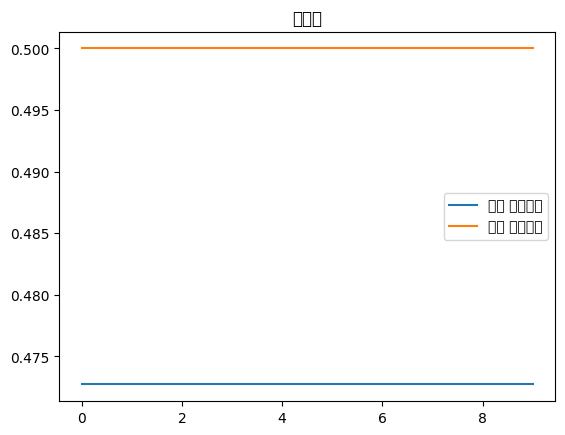

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


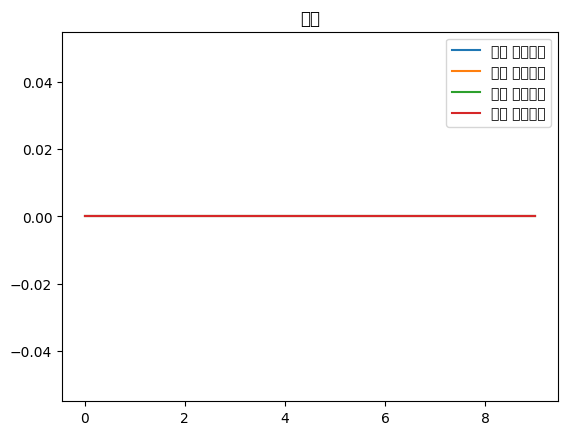

In [34]:
BATCH_SIZE = 32  # 배치 크기 설정 (한 번에 처리할 데이터의 수)
image_height = 224  # 입력 이미지의 높이
image_width = 224  # 입력 이미지의 너비
train_dir = "train/"  # 훈련 데이터가 있는 디렉토리 경로
valid_dir = "validation/"  # 검증 데이터가 있는 디렉토리 경로

# 훈련 데이터 전처리 및 증강 설정
train = ImageDataGenerator(
    rescale=1./255,  # 이미지의 픽셀 값을 [0, 1]로 정규화
    rotation_range=10,  # 이미지를 무작위로 회전시킬 범위
    width_shift_range=0.1,  # 이미지를 수평으로 이동시킬 범위
    height_shift_range=0.1,  # 이미지를 수직으로 이동시킬 범위
    shear_range=0.1,  # 이미지를 임의로 기울일 범위
    zoom_range=0.1)  # 이미지를 무작위로 확대하거나 축소할 범위

# 검증 데이터 전처리 설정 (정규화만 수행)
valid = ImageDataGenerator(rescale=1.0/255.0)

# 훈련 데이터를 디렉토리에서 불러오기
train_generator = train.flow_from_directory(train_dir,
                                            target_size=(image_height, image_width),  # 이미지 크기 변경
                                            color_mode="rgb",  # RGB 컬러 모드로 이미지 로드
                                            batch_size=BATCH_SIZE,  # 배치 크기
                                            seed=1,  # 랜덤 시드 설정
                                            shuffle=True,  # 데이터 섞기
                                            class_mode="categorical")  # 다중 클래스 분류

# 검증 데이터를 디렉토리에서 불러오기
valid_generator = valid.flow_from_directory(valid_dir,
                                            target_size=(224, 224),  # 입력 이미지 크기 변경 (크기를 일치시켜 오류 방지)
                                            color_mode="rgb",  # RGB 컬러 모드로 이미지 로드
                                            batch_size=BATCH_SIZE,  # 배치 크기
                                            seed=7,  # 랜덤 시드 설정
                                            shuffle=True,  # 데이터 섞기
                                            class_mode="categorical")  # 다중 클래스 분류

# 모델 훈련
history = model.fit(train_generator,  # 훈련 데이터
                    epochs=10,  # 에폭 수
                    validation_data=valid_generator,  # 검증 데이터
                    verbose=2)  # 훈련 진행 상황을 출력



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


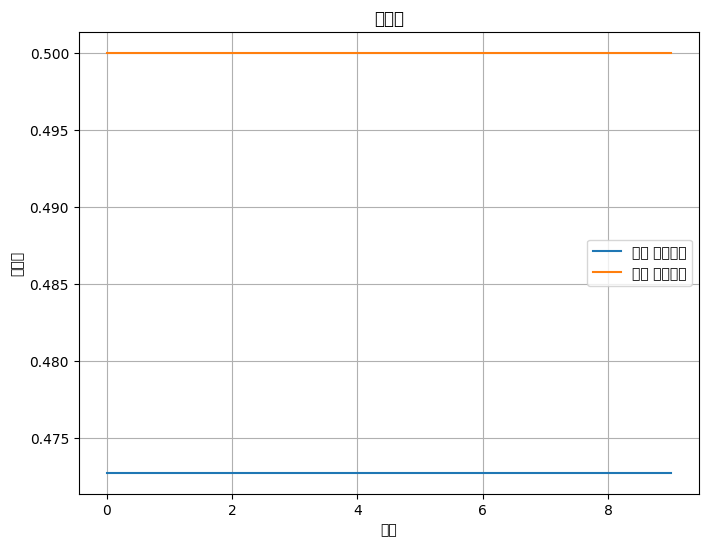

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


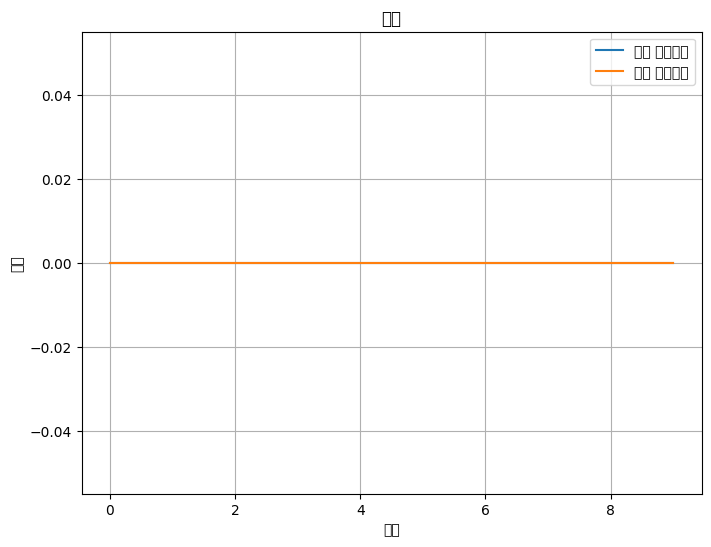

In [30]:
# 훈련과 검증 데이터의 정확도 및 손실 값을 그래프에 그리기
accuracy = history.history['accuracy']  # 훈련 데이터 정확도
val_accuracy = history.history['val_accuracy']  # 검증 데이터 정확도

loss = history.history['loss']  # 훈련 데이터 손실
val_loss = history.history['val_loss']  # 검증 데이터 손실

epochs = range(len(accuracy))  # 에폭 횟수에 맞춰 x축 값 설정

# 정확도 그래프 그리기
plt.plot(epochs, accuracy, label="훈련 데이터셋")  # 훈련 정확도
plt.plot(epochs, val_accuracy, label="검증 데이터셋")  # 검증 정확도
plt.legend()  # 범례 표시
plt.title('정확도')  # 그래프 제목
plt.figure()  # 새로운 그래프 창 생성

# 손실 그래프 그리기
plt.plot(epochs, loss, label="훈련 데이터셋")  # 훈련 손실
plt.plot(epochs, val_loss, label="검증 데이터셋")  # 검증 손실
plt.legend()  # 범례 표시
plt.title('오차')  # 그래프 제목

# 손실 그래프 다시 그리기 (중복 그래프)
plt.plot(epochs, loss, label="훈련 데이터셋")  # 훈련 손실
plt.plot(epochs, val_loss, label="검증 데이터셋")  # 검증 손실
plt.legend()  # 범례 표시
plt.title('오차')  # 그래프 제목


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


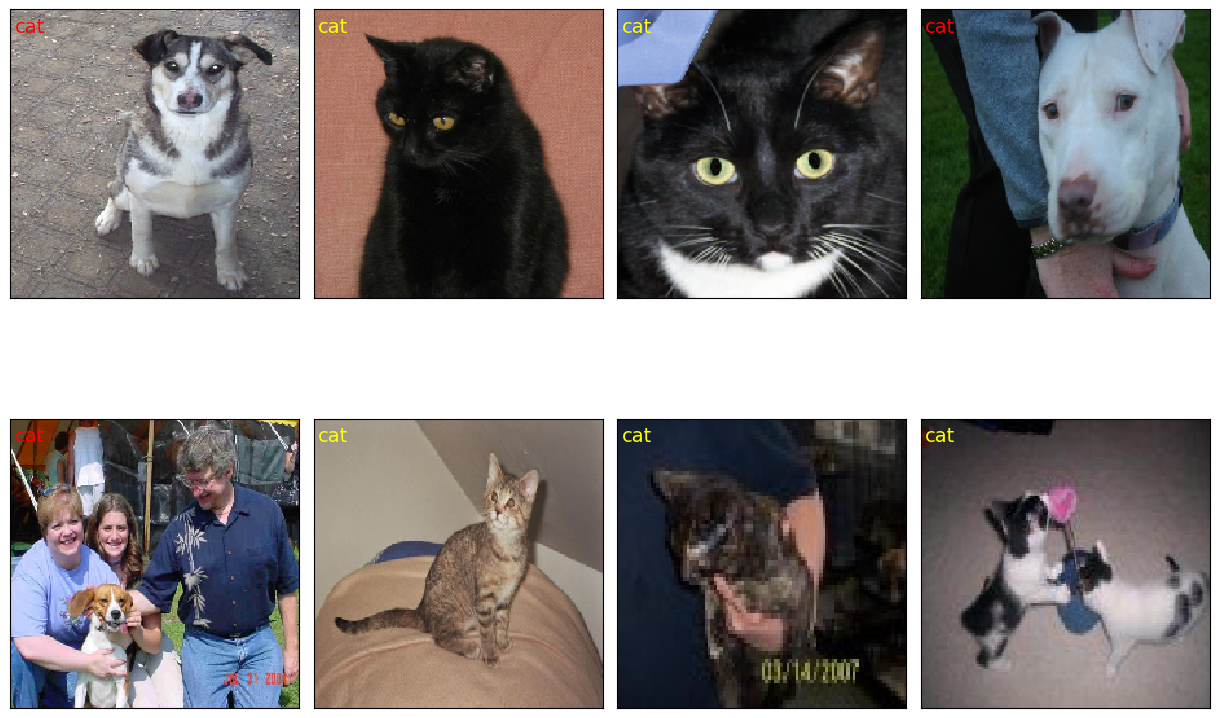

In [31]:
class_names = ['cat', 'dog']  # 고양이와 개 클래스 정의
validation, label_batch  = next(iter(valid_generator))  # 검증 데이터와 레이블을 하나의 배치로 가져옴
prediction_values = model.predict(validation)  # 모델을 사용하여 예측값 생성
prediction_values = np.argmax(prediction_values, axis=1)  # 예측값에서 가장 큰 값의 인덱스를 추출 (클래스 예측)

# 2x4 그리드로 이미지 출력 공간 설정
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)  # 서브플롯 간 간격 조정

for i in range(8):  # 8개의 이미지를 출력
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])  # 2x4 그리드의 서브플롯 위치 지정
    ax.imshow(validation[i], interpolation='nearest')  # 각 이미지를 표시
    # 예측값과 실제 레이블을 비교하여 색상으로 표시
    if prediction_values[i] == np.argmax(label_batch[i]):  # 예측이 맞으면
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)  # 노란색으로 텍스트 표시
    else:  # 예측이 틀리면
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)  # 빨간색으로 텍스트 표시

plt.show()  # 그래프 출력


In [32]:
# 텐서플로 허브를 이용한 코드

In [33]:
#pip install tensorflow_hub
import tensorflow_hub as hub
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                   input_shape=(224, 224, 3),
                   trainable=False),
    tf.keras.layers.Dense(2, activation='softmax')
])

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x79349ee425c0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [ ]:
train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from matplotlib import pyplot as plt

In [ ]:
img=load_img('bird.jpg')
data=img_to_array(img)

In [ ]:
#width_shift_range 이용한 이미지 증가
img_data=expand_dims(data, 0)
data_gen=ImageDataGenerator(width_shift_range=[-200,200])
data_iter=data_gen.flow(img_data, batch_size=1)
fig=plt.figure(figsize=(30,30))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch=data_iter.next()
    image=batch[0].astype('uint16')
    plt.imshow(image)
plt.show()

In [ ]:
# height_shift_range 이용한 이미지 증가
img_data=expand_dims(data, 0)
data_gen=ImageDataGenerator(height_shift_range=0.5)
data_iter=data_gen.flow(img_data, batch_size=1)
fig=plt.figure(figsize=(30,30))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch=data_iter.next()
    image=batch[0].astype('uint16')
    plt.imshow(image)
plt.show()

In [ ]:
# flip 이용한 이미지 증가
img_data=expand_dims(data, 0)
data_gen=ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
data_iter=data_gen.flow(img_data, batch_size=1)
fig=plt.figure(figsize=(30,30))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch=data_iter.next()
    image=batch[0].astype('uint16')
    plt.imshow(image)
plt.show()

In [ ]:
# rotation_range 이용한 이미지 증가
img_data=expand_dims(data, 0)
data_gen=ImageDataGenerator(rotation_range=90)
data_iter=data_gen.flow(img_data, batch_size=1)
fig=plt.figure(figsize=(30,30))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch=data_iter.next()
    image=batch[0].astype('uint16')
    plt.imshow(image)
plt.show()

In [ ]:
# brightness 이용한 이미지 증가
img_data=expand_dims(data, 0)
data_gen=ImageDataGenerator(brightness_range=[0.3,1.2])
data_iter=data_gen.flow(img_data, batch_size=1)
fig=plt.figure(figsize=(30,30))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch=data_iter.next()
    image=batch[0].astype('uint16')
    plt.imshow(image)
plt.show()

In [ ]:
# zoom 이용한 이미지 증가
img_data=expand_dims(data, 0)
data_gen=ImageDataGenerator(zoom_range=[0.4, 1.5])
data_iter=data_gen.flow(img_data, batch_size=1)
fig=plt.figure(figsize=(30,30))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch=data_iter.next()
    image=batch[0].astype('uint16')
    plt.imshow(image)
plt.show()

In [ ]:
history=model.fit(train_generator,
          epochs=10,
          validation_data=valid_generator,
          verbose=2)

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

In [ ]:
class_names = ['cat', 'dog']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

In [ ]:
# 5.4 설명가능한 CNN(eXplainable CNN)
# 5.4.1 특성 맵 시각화

In [ ]:
#pip install keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3), activation='relu', kernel_size=(5,5), filters=32),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')

])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)        102464    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 64)         

In [ ]:
ins= model.inputs
outs= model.layers[0].output
feature_map= Model(inputs= ins, outputs= outs)
feature_map.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        2432      
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


Saving cat.jpg to cat.jpg


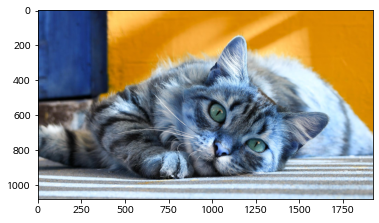

In [ ]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()

img=cv2.imread("cat.jpg")
plt.imshow(img)

(1, 100, 100, 3)
(1, 96, 96, 32)


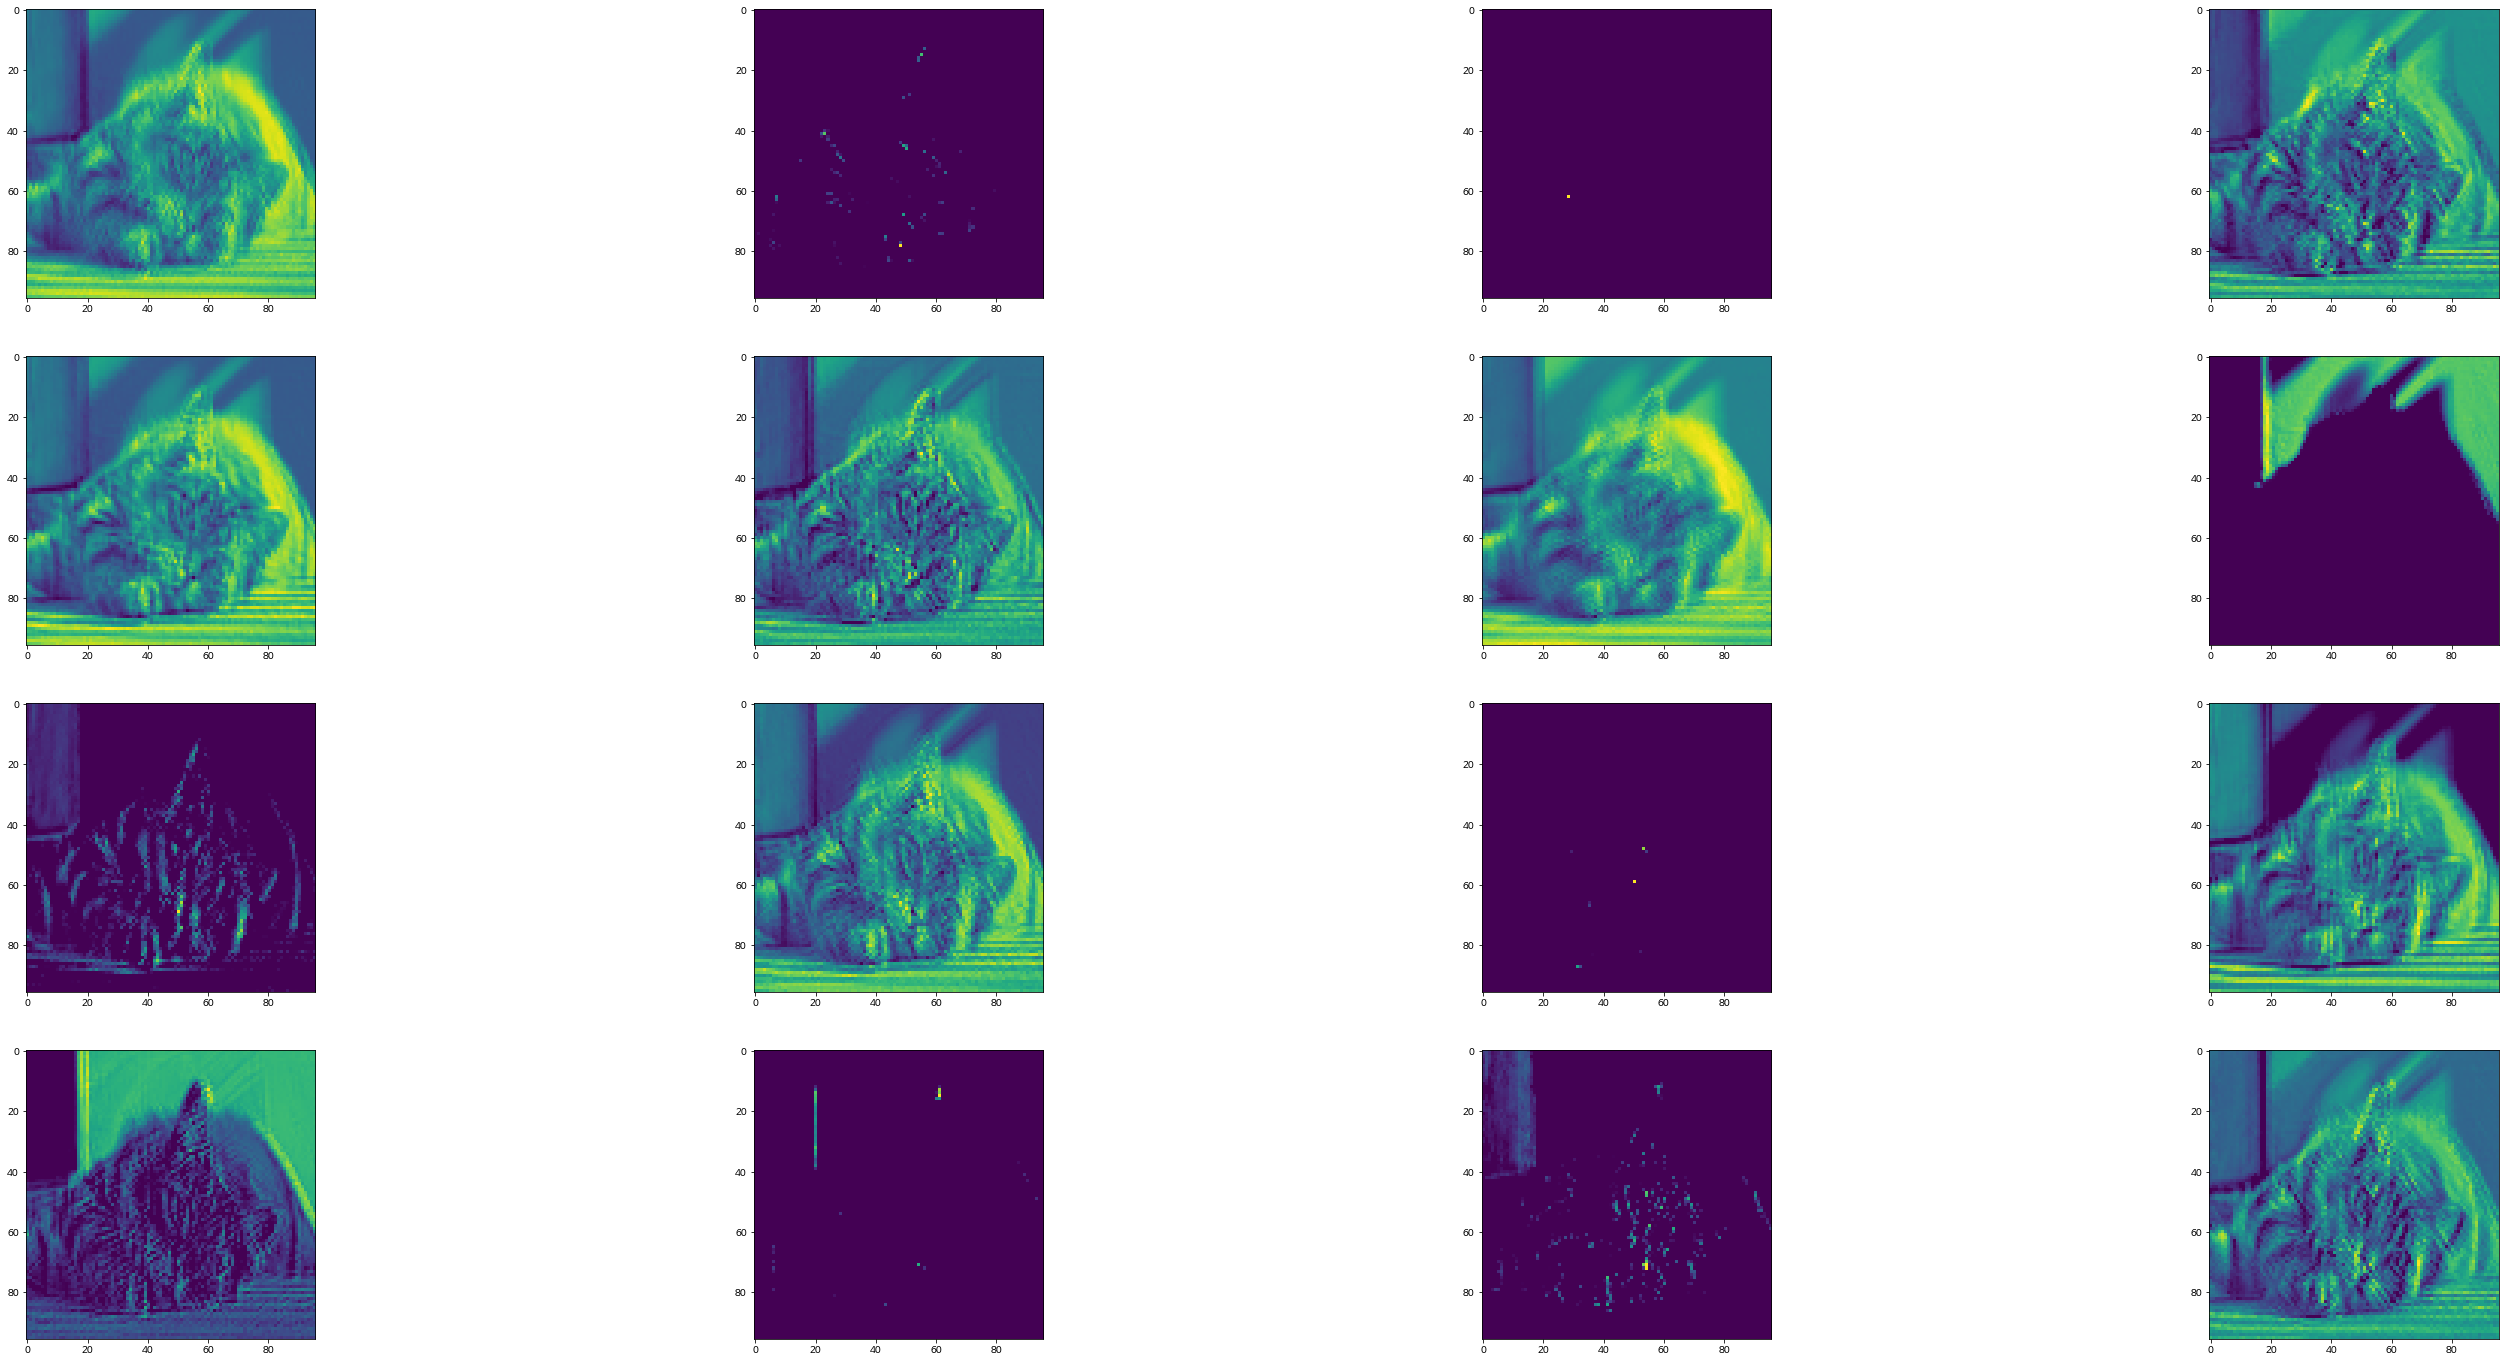

In [ ]:
img=cv2.resize(img,(100,100))
input_img= np.expand_dims(img, axis=0)
print(input_img.shape)
feature=feature_map.predict(input_img)
print(feature.shape)
fig= plt.figure(figsize=(50,50))
for i in range(16):
    ax=fig.add_subplot(8,4,i+1)
    ax.imshow(feature[0,:,:,i])

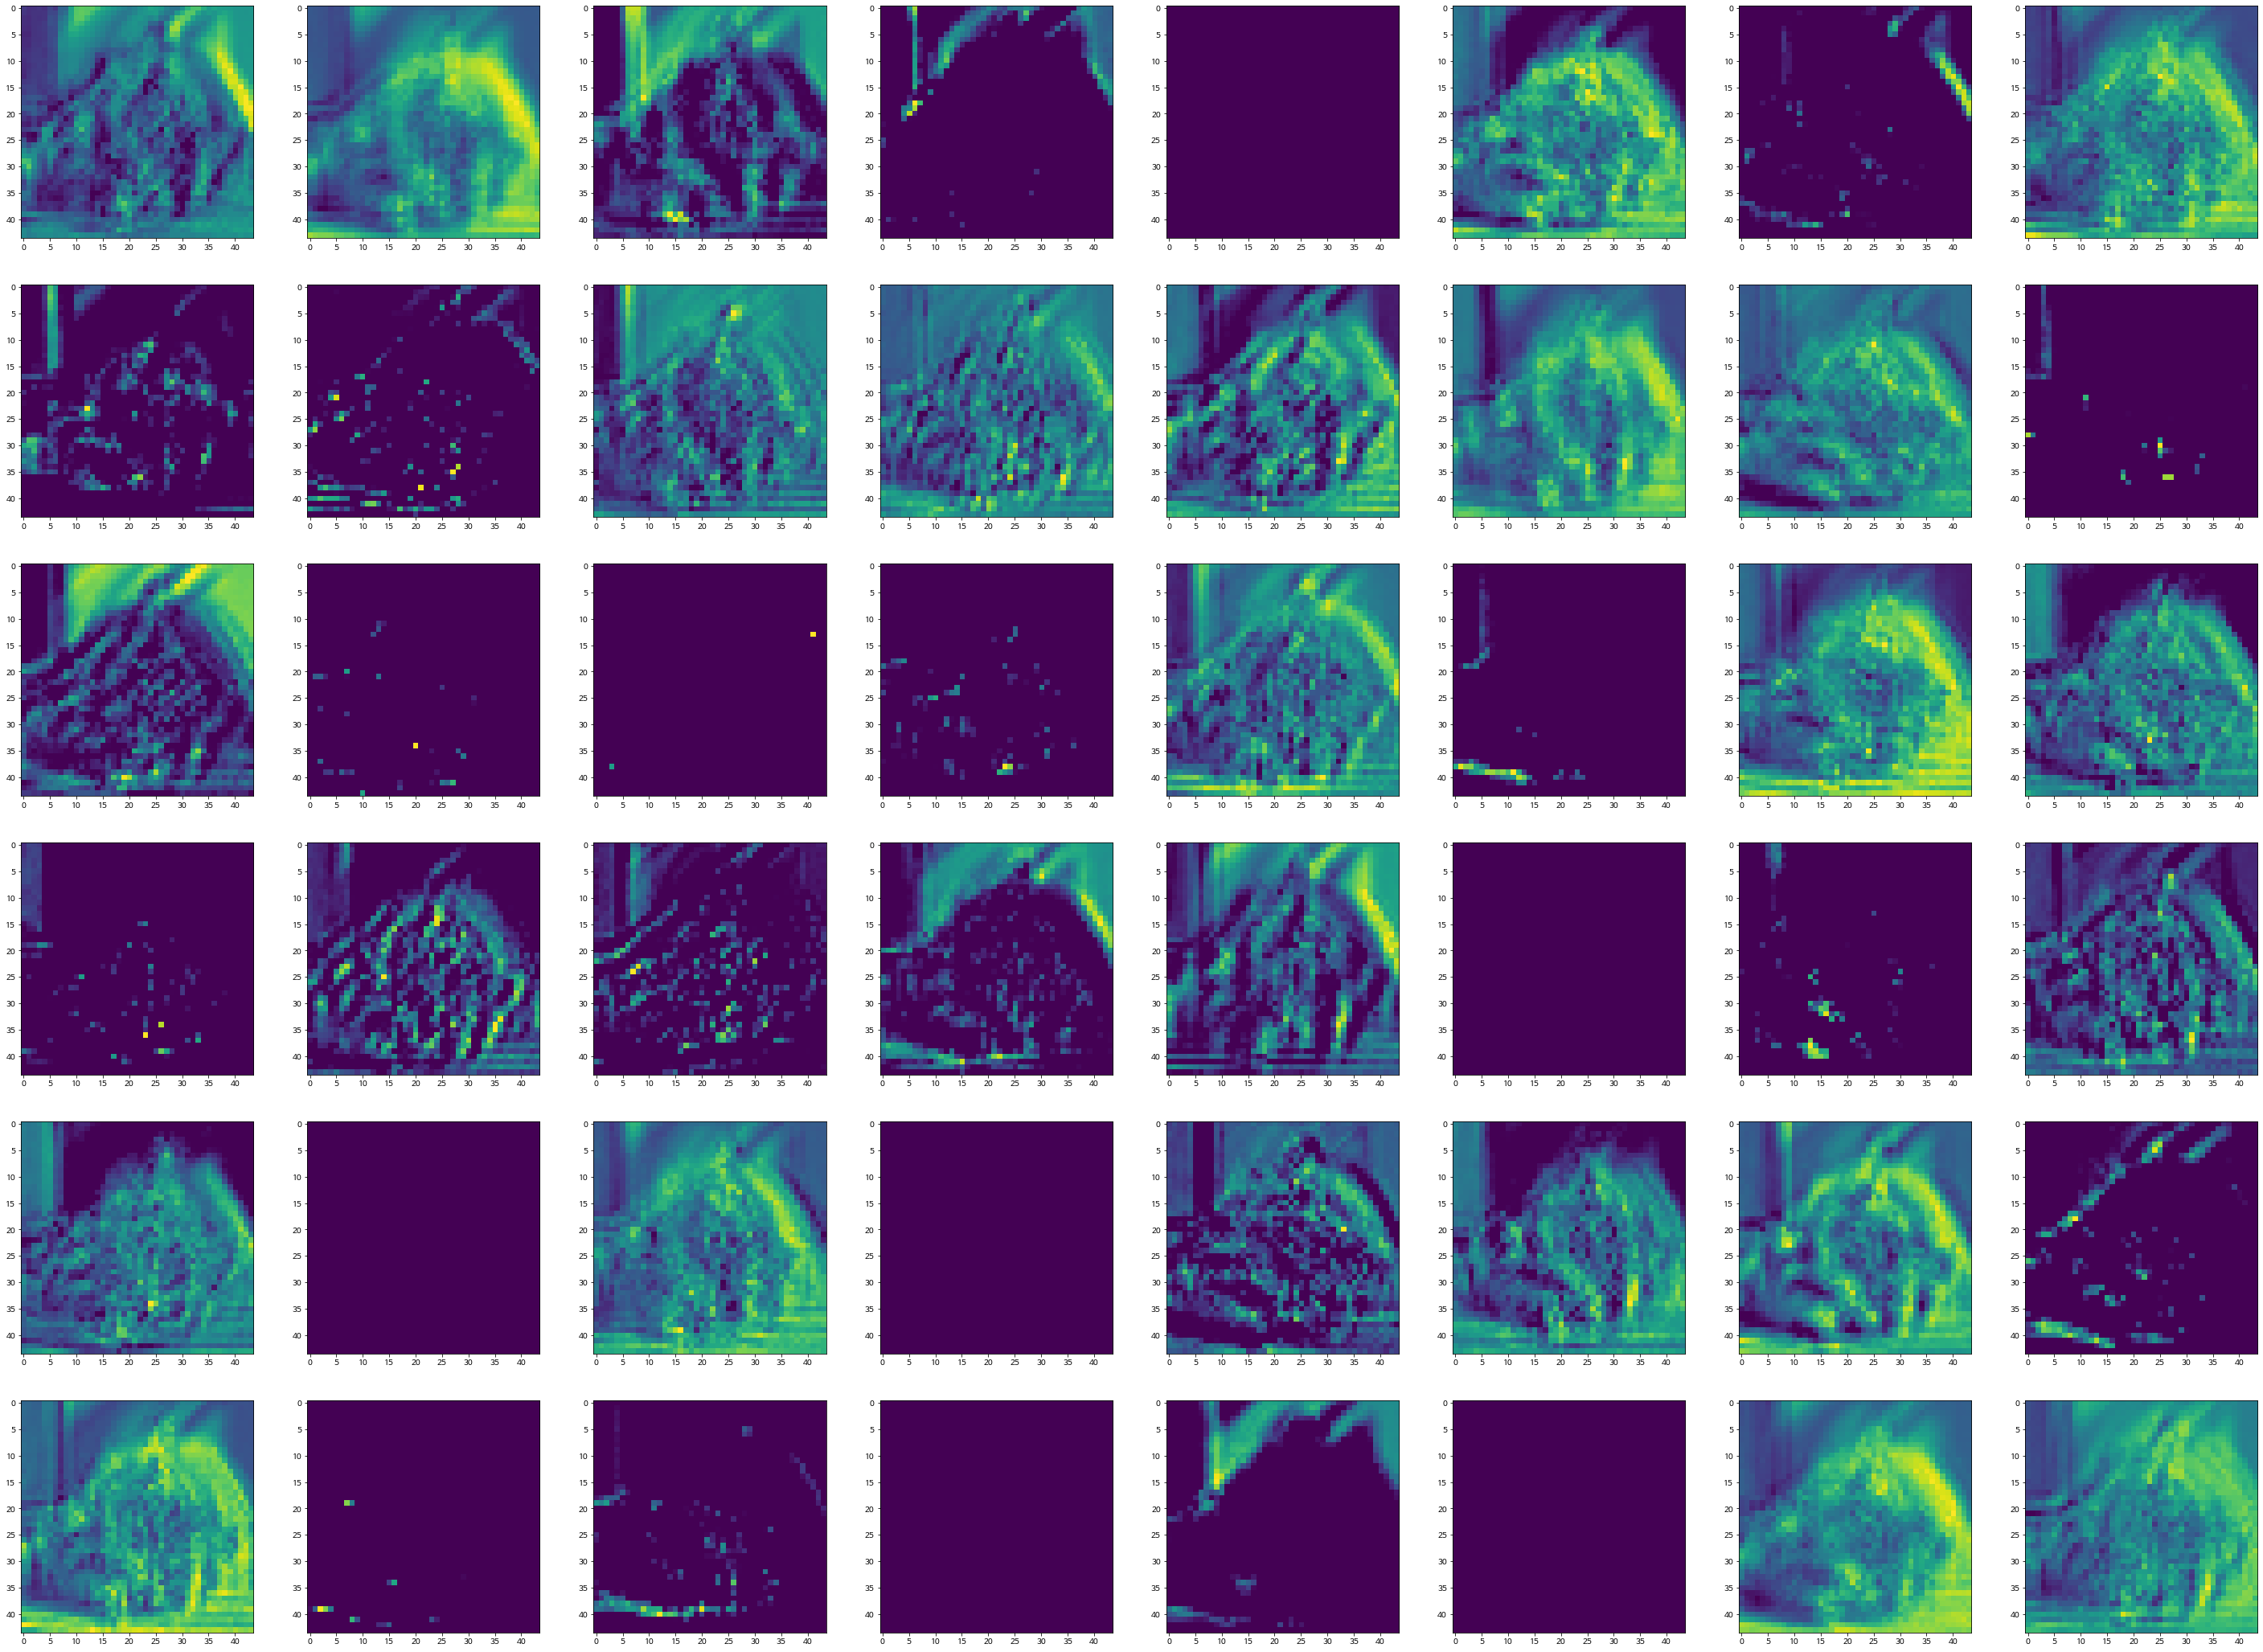

In [ ]:
ins= model.inputs
outs= model.layers[2].output
feature_map= Model(inputs= ins, outputs= outs)
img=cv2.imread("cat.jpg")
img=cv2.resize(img,(100,100))
input_img= np.expand_dims(img, axis=0)

feature=feature_map.predict(input_img)
fig= plt.figure(figsize=(50,50))
for i in range(48):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(feature[0,:,:,i])

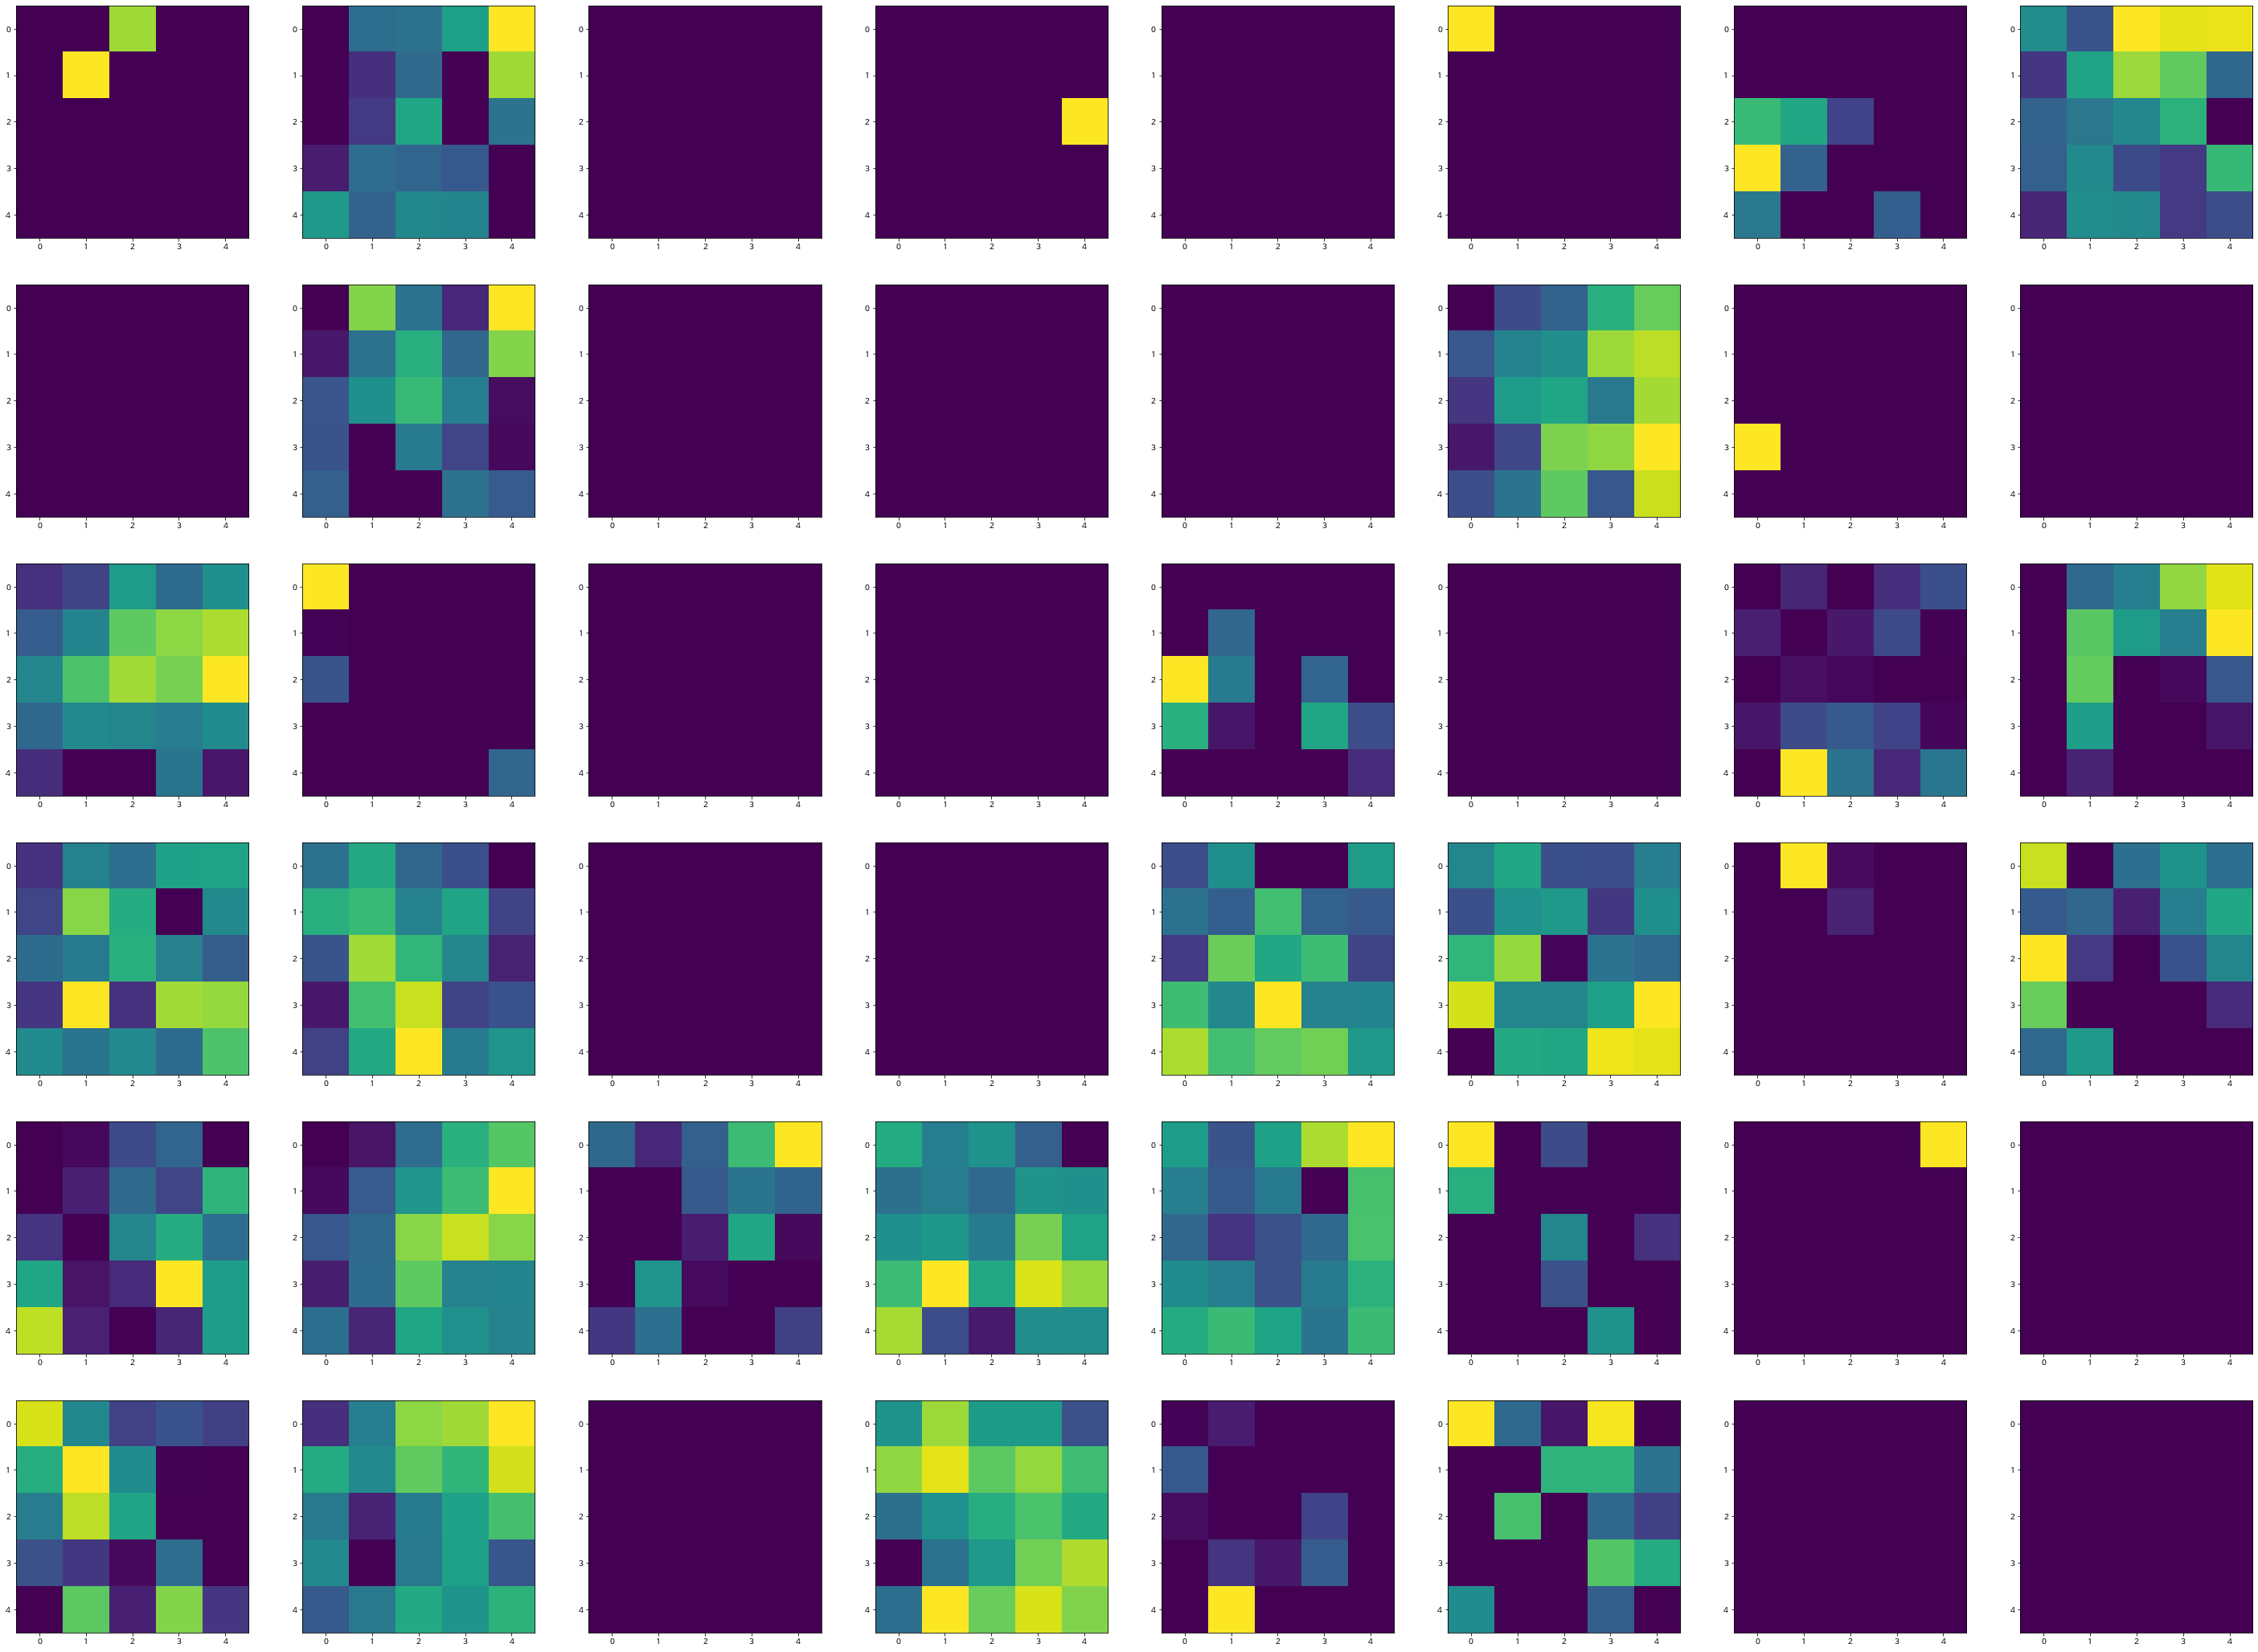

In [ ]:
ins= model.inputs
outs= model.layers[6].output
feature_map= Model(inputs= ins, outputs= outs)
img=cv2.imread("cat.jpg")
img=cv2.resize(img,(100,100))
input_img= np.expand_dims(img, axis=0)

feature=feature_map.predict(input_img)
fig= plt.figure(figsize=(50,50))
for i in range(48):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(feature[0,:,:,i])